In [39]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from csv import reader
from mpl_toolkits.basemap import Basemap

Import data and store it as dataframe called sensor_df

In [40]:
csv_file_name = 'sensor_positions.csv'
columns = ['sensor_name', 'latitude', 'longitude', 'region']
sensor_df = pd.DataFrame(columns=columns, index=[0])

with open('./data/' + csv_file_name, 'r') as read_obj:
    csv_reader = reader(read_obj)
    for row in csv_reader:
        data = {columns[0]: row[1], columns[1]: float(row[0].split(' ')[0].replace('(', '')), columns[2]: float(row[0].split(' ')[1].replace(')', '')), columns[3] : ''}
        data_df = pd.DataFrame(data, columns=columns, index=[0])
        sensor_df = pd.concat([sensor_df, data_df])

sensor_df = sensor_df.dropna()

Add the region to the corresponding sensor

In [41]:
folders = ['region_1_mustamäe_kristiine', 'region_2_data_kesklinn', 'region_3_kadriorg_lasnamäe', 'region_4_ülemiste']

for folder in folders:
    for file in os.listdir('data/' + folder):
        sensor_name = file.split('-')[0]
        region = int(folder.split('_')[1])
        sensor_df.loc[sensor_df.sensor_name==sensor_name, 'region'] = region

print(sensor_df.head())

  sensor_name   latitude  longitude region
0        2004  24.726405  59.398497      2
0        2013  24.748805  59.434405      2
0        2015  24.751089  59.434361      2
0        2018  24.726473  59.396803      1
0        201A  24.744596  59.441991      2


Plot sensor locations as scatter plot on top of an image of Tallinn's map

In [42]:
def plot_sensor_positions(df, all_regions):

    tallinn_map = plt.imread('data/map.png')

    image_width = tallinn_map.shape[1] / 100 * 2
    image_height = tallinn_map.shape[0] / 100 * 2

    lon_min = df['longitude'].min()
    lon_max = df['longitude'].max()
    lat_min = df['latitude'].min()
    lat_max = df['latitude'].max()

    colors = ['red', 'blue', 'green', 'black']

    fig, ax = plt.subplots(figsize=(image_width, image_height))

    # Create basemap with specified boundaries
    m = Basemap(projection='merc', resolution='h',
                llcrnrlon=lat_min, llcrnrlat=lon_min,
                urcrnrlon=lat_max, urcrnrlat=lon_max)
    m.imshow(tallinn_map, interpolation='lanczos', origin='upper')

    # Plot sensor locations
    for i, r in enumerate(all_regions):
        x, y = m(df[df['region'] == r]['latitude'].values, df[df['region'] == r]['longitude'].values)
        m.scatter(x, y, c=colors[i], marker='o', s=10)

    ax.set_xlabel('latitude')
    ax.set_ylabel('longitude')

    legend = ["Region " + str(r) for r in all_regions]
    ax.legend(legend)

    plt.show()

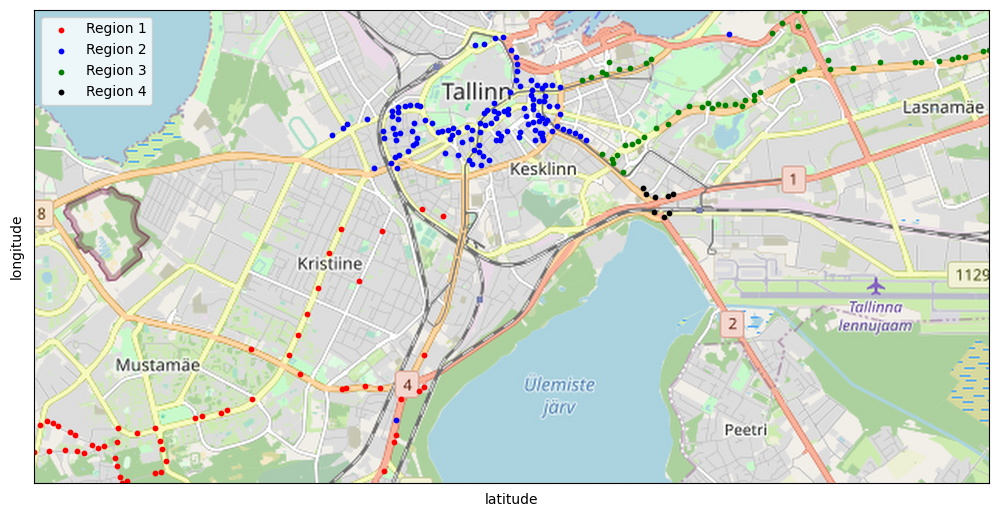

In [43]:
regions = sensor_df['region'].sort_values().unique()

plot_sensor_positions(sensor_df, regions)

2 sensors labeled as region 2 do belong to other regions instead. We can identify them by having the region 2 and the min (max) value of longitude (latitude). Let's change their label of region.

In [44]:
region2_max_lat = sensor_df[sensor_df['region'] == 2]['latitude'].max()
region2_min_lon = sensor_df[sensor_df['region'] == 2]['longitude'].min()

sensor_df.loc[(sensor_df.region==2) & (sensor_df.latitude==region2_max_lat), 'region'] = 3
sensor_df.loc[(sensor_df.region==2) & (sensor_df.longitude==region2_min_lon), 'region'] = 1

Plot the sensor positions again

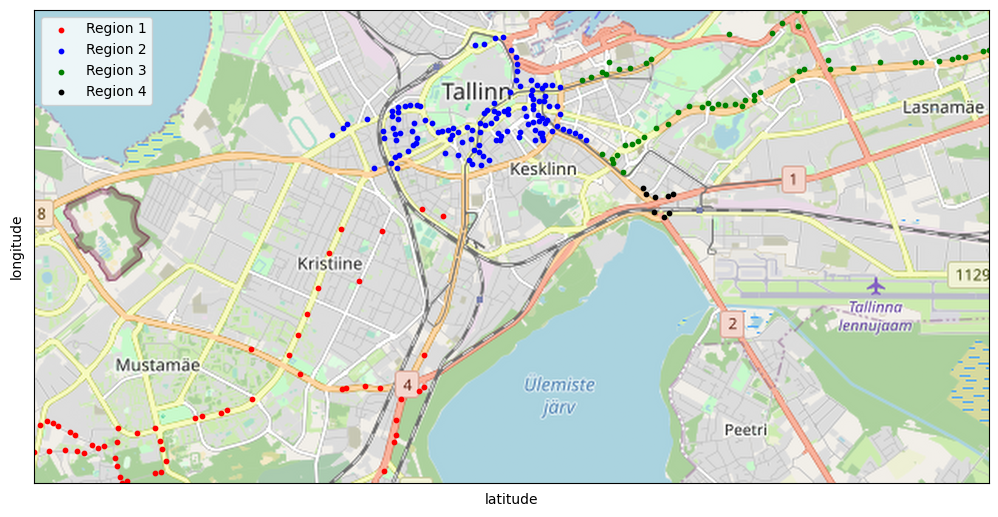

In [45]:
plot_sensor_positions(sensor_df, regions)

Let's explore the data about the regions

Number of sensors per region:


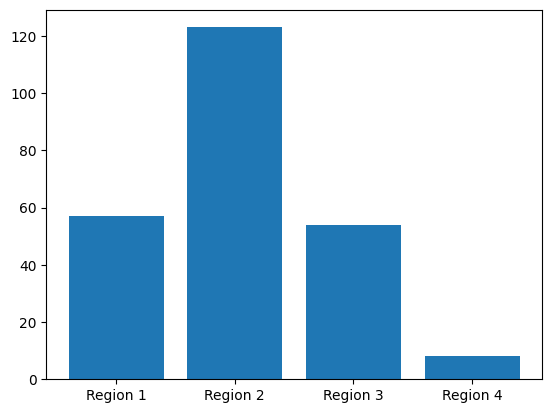

In [46]:
print('Number of sensors per region:')
amount_sensors_per_region = sensor_df.groupby('region')['sensor_name'].count()
regions = ["Region " + str(r) for r in regions]
plt.bar(regions, amount_sensors_per_region)
plt.show()

Provide background information about their distribution around the city.
What regions of the city are likely to be the nosiest, and are they well-covered by these locations?

Region 1: Mustamäe / Kristiine
The sensors are distributed along roads almost equally. In total, the sensors cover quite a huge area. Probably the noise level will be constantly high during rush hours due to high traffic volume. However, during nighttime the noise level will be comparatively low.

Region 2: City Center
The city center is the most densely covered region of all. The sensors are distributed along roads while the old town is not covered by sensors at all. Presumably, the sensors will measure a high noise level at main roads throughout the whole day. At the same time the noise level on smaller roads will be less. Therefore, the average noise level during the day will not be the highest of all regions. However, we expect the noise level to be consistent.

Region 3: Kadriorg / Lasnamäe
For region 3 we assume that similar characteristics than region 1 apply to it. The sensors cover a wide area, although they are distributed more densely.

Region 4: Rail Baltica
Sensors are placed close to an intersection of 2 highways and a train station. The area is well covered by 8 sensors. However, compared to other regions, region 4 covers only a small area mainly consisting of the intersection and the train station. Therefore, the region is likely to be the noisiest, with constant, high noise levels during the day and with additional peaks issued by trains.

If you could suggest additional station locations, where would you put them?
